# Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import Datasets

In [4]:
# load datasets
ecommerce = pd.read_csv('/content/drive/MyDrive/DATA SCIENCE BOOTCAMP/Day 20 21 - EDA/ecommerce.csv')

# Data Pre-processing

In [5]:
# top 5 rows
ecommerce.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,554697,21166,COOK WITH WINE METAL SIGN,1,5/25/2011 17:31,2.08,14584,United Kingdom
1,561038,82482,WOODEN PICTURE FRAME WHITE FINISH,2,7/24/2011 11:58,2.55,17114,United Kingdom
2,560552,23192,BUNDLE OF 3 ALPHABET EXERCISE BOOKS,1,7/19/2011 12:54,1.65,15311,United Kingdom
3,559884,85183B,CHARLIE & LOLA WASTEPAPER BIN FLORA,12,7/13/2011 11:34,1.25,16843,United Kingdom
4,544450,21789,KIDS RAIN MAC PINK,3,2/20/2011 12:23,0.85,17811,United Kingdom


In [6]:
# general info
ecommerce.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4870 entries, 0 to 4869
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    4870 non-null   int64  
 1   StockCode    4870 non-null   object 
 2   Description  4870 non-null   object 
 3   Quantity     4870 non-null   int64  
 4   InvoiceDate  4870 non-null   object 
 5   UnitPrice    4870 non-null   float64
 6   CustomerID   4870 non-null   int64  
 7   Country      4870 non-null   object 
dtypes: float64(1), int64(3), object(4)
memory usage: 304.5+ KB


Observation:
1. No missing values!
2. Seems need to convert `InvoiceDate` to datetime format

In [7]:
# check for duplicates
ecommerce.duplicated().sum()

0

No duplicate data

In [8]:
# convert InvoiceDate to datetime format
ecommerce['InvoiceDate'] = pd.to_datetime(ecommerce['InvoiceDate'])
ecommerce.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,554697,21166,COOK WITH WINE METAL SIGN,1,2011-05-25 17:31:00,2.08,14584,United Kingdom
1,561038,82482,WOODEN PICTURE FRAME WHITE FINISH,2,2011-07-24 11:58:00,2.55,17114,United Kingdom
2,560552,23192,BUNDLE OF 3 ALPHABET EXERCISE BOOKS,1,2011-07-19 12:54:00,1.65,15311,United Kingdom
3,559884,85183B,CHARLIE & LOLA WASTEPAPER BIN FLORA,12,2011-07-13 11:34:00,1.25,16843,United Kingdom
4,544450,21789,KIDS RAIN MAC PINK,3,2011-02-20 12:23:00,0.85,17811,United Kingdom


In [9]:
# check info again
ecommerce.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4870 entries, 0 to 4869
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    4870 non-null   int64         
 1   StockCode    4870 non-null   object        
 2   Description  4870 non-null   object        
 3   Quantity     4870 non-null   int64         
 4   InvoiceDate  4870 non-null   datetime64[ns]
 5   UnitPrice    4870 non-null   float64       
 6   CustomerID   4870 non-null   int64         
 7   Country      4870 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(3)
memory usage: 304.5+ KB


# Statistical Summary

In [10]:
numerical = ['Quantity','UnitPrice']
# Distribution of numerical data
ecommerce[numerical].describe()

,Quantity,UnitPrice
count,4870.000000,4870.000000
mean,12.945791,2.937057
std,38.145988,4.744515
min,1.000000,0.040000
25%,2.000000,1.250000
50%,5.000000,1.950000
75%,12.000000,3.750000
max,992.000000,145.000000


# Univariate Analysis

## Data Distribution

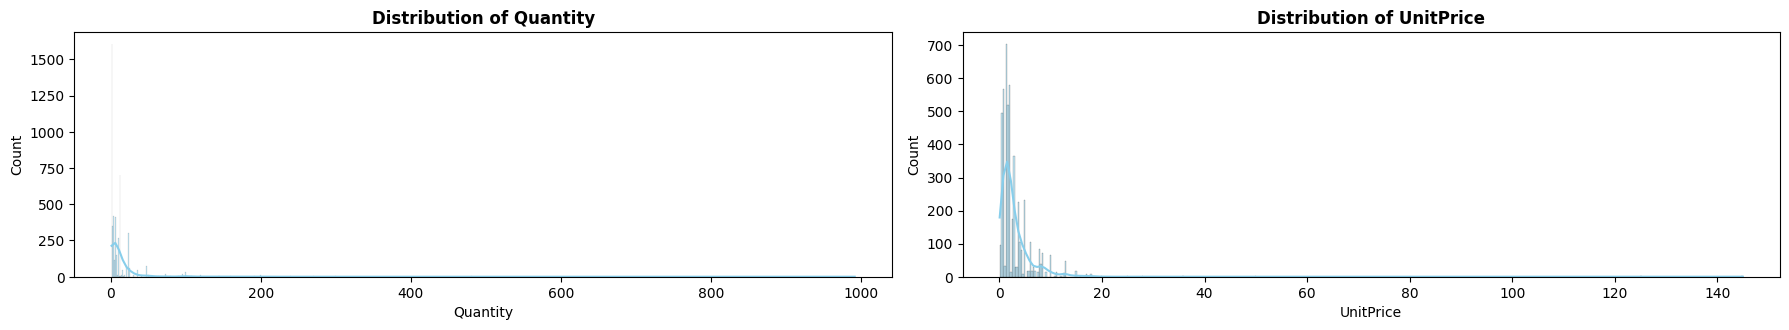

In [11]:
plt.figure(figsize=(18,6))

features = numerical
for i in range(0, len(features)):
    plt.subplot(2, len(features)//2 + 1, i+1)
    sns.histplot(x=ecommerce[features[i]], color='skyblue', kde=True)
    plt.title(f'Distribution of {features[i]}', fontsize=12, fontweight='bold')
    plt.xlabel(features[i])
    plt.tight_layout()

Both quantity and UnitPrice has right-skewed distribution.

## EDA Questions
 1. Product trends: What are the Top 10 products with the most transactions?
 2. Product trends: What are the Top 10 products with the LEAST transactions?
 3. Customer Behaviour: How many distinct products are sold? How is their price distribution?
 4. Customer Behaviour: From what countries do the customers come? Which country has the most loyal customers?
 5. Annual Performances (Time-series): How is the monthly count buyers profile (time series)?
 6. Annual Performances (Time-series): How is the monthly revenue profile (time series)?

### Top 10 products with most/least transactions
We need to perform group by aggregation. Basis group-by is `Description`, while number of transactions = count `InvoiceNo`. After aggregating, do appropriate sorting and truncation.

In [12]:
# Top 10 products with the most transactions
top10_prod = (ecommerce
            .groupby('Description')
            .agg(num_trx=('InvoiceNo','count'))
            .reset_index() # optional
            .sort_values('num_trx',ascending=False)
            .head(10)
            )
top10_prod

,Description,num_trx
793,JUMBO BAG RED RETROSPOT,24
1060,PARTY BUNTING,22
1238,REGENCY CAKESTAND 3 TIER,21
1724,WHITE HANGING HEART T-LIGHT HOLDER,19
66,60 TEATIME FAIRY CAKE CASES,18
1385,SET OF 3 CAKE TINS PANTRY DESIGN,16
1416,SET OF 4 PANTRY JELLY MOULDS,16
1205,RED RETROSPOT CHARLOTTE BAG,15
770,JAM MAKING SET PRINTED,15
108,ASSORTED COLOUR BIRD ORNAMENT,15


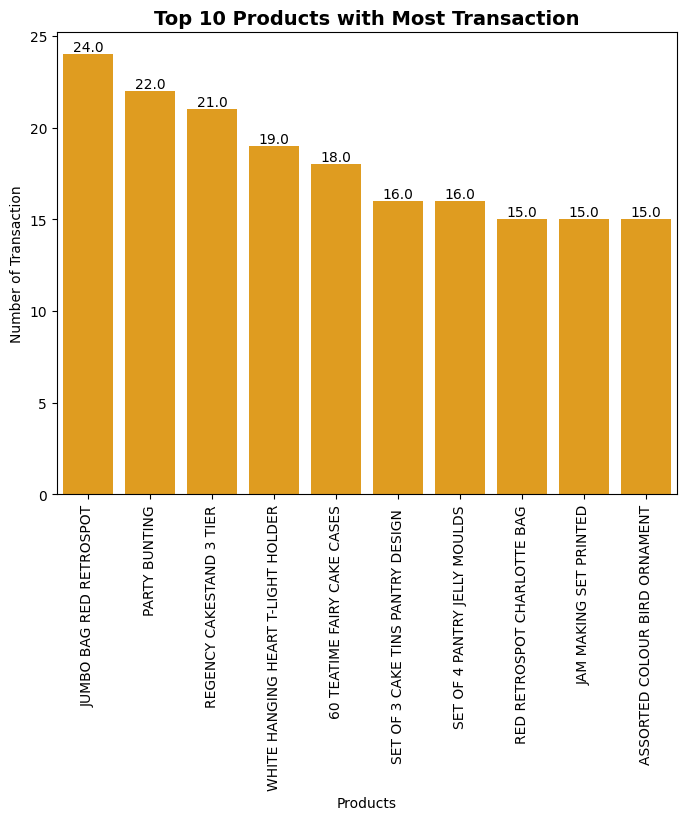

In [13]:
# visualize it
plt.figure(figsize=(8,6))
barplot = sns.barplot(data=top10_prod, x='Description', y='num_trx', color='orange')

for bar in barplot.patches:
    barplot.annotate(
        format(bar.get_height()),  # Format angka (2 desimal)
        (bar.get_x() + bar.get_width() / 2, bar.get_height()),  # Posisi anotasi
        ha='center', va='bottom', fontsize=10, color='black'
    )
plt.xticks(rotation=90)
plt.title('Top 10 Products with Most Transaction', fontsize = 14, fontweight='bold')
plt.xlabel('Products')
plt.ylabel('Number of Transaction')
plt.show()

Insight:<br>
10 produts that highly popular are: JUMBO BAG RED RETROSPOT, PARTY BUNTING, REGENCY CAKESTAND, WHITE HANGING HEART T-LIGHT HOLDER, TEATIME FAIRY CAKE CASES, SET OF 3 CAKE TINS PANTRY DESIGN, SET OF 4 PANTRY JELLY MOULDS, RED RETROSPOT CHARLOTTE BAG, JAM MAKING SET PRINTED, ASSORTED COLOUR BIRD ORNAMENT<br>
Recommendation:
1. Increase Stock Levels: Ensure these products are well-stocked to meet demand and prevent stockouts.
2. Upselling Opportunities: Bundle these popular products with other less popular or higher-margin items to increase the average transaction value.
3. Expand Marketing Campaigns: Focus on these products in advertisements or promotions to maximize their potential further.

In [14]:
# Low 10 products in terms of transactions
low10_prod = (ecommerce
            .groupby('Description')
            .agg(num_trx=('InvoiceNo','count'))
            .reset_index()
            .sort_values('num_trx',ascending=False)
            .tail(10)
            )
low10_prod

,Description,num_trx
512,FAIRY TALE COTTAGE NIGHT LIGHT,1
1195,RED LOVE HEART SHAPE CUP,1
1197,RED PAPER PARASOL,1
507,EUCALYPTUS & PINECONE WREATH,1
1199,RED RETRO KITCHEN WALL CLOCK,1
506,ENGLISH ROSE NOTEBOOK A7 SIZE,1
1201,RED RETROSPOT BIG BOWL,1
1203,RED RETROSPOT BUTTER DISH,1
500,ENAMEL PINK TEA CONTAINER,1
903,MEASURING TAPE BABUSHKA PINK,1


Not so interesting to visualize, because all have single transaction.

Recommendation: Reposition or Discontinue: Consider rebranding, bundling, or discontinuing products that consistently underperform.

### Top 10 Customers in money spend
We need to create a new column `total_price = Quantity * UnitPrice`. Then sum it based on group-by CustomerID.

In [15]:
ecommerce.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,554697,21166,COOK WITH WINE METAL SIGN,1,2011-05-25 17:31:00,2.08,14584,United Kingdom
1,561038,82482,WOODEN PICTURE FRAME WHITE FINISH,2,2011-07-24 11:58:00,2.55,17114,United Kingdom
2,560552,23192,BUNDLE OF 3 ALPHABET EXERCISE BOOKS,1,2011-07-19 12:54:00,1.65,15311,United Kingdom
3,559884,85183B,CHARLIE & LOLA WASTEPAPER BIN FLORA,12,2011-07-13 11:34:00,1.25,16843,United Kingdom
4,544450,21789,KIDS RAIN MAC PINK,3,2011-02-20 12:23:00,0.85,17811,United Kingdom


In [16]:
# create total_price column
ecommerce['total_price'] = ecommerce['Quantity'] * ecommerce['UnitPrice']

# group by aggregation
top10_cust = (ecommerce
            .groupby('CustomerID')
            .agg(total_spend=('total_price','sum'))
            .reset_index()
            .sort_values('total_spend',ascending=False)
            .head(10)
            )

top10_cust

,CustomerID,total_spend
758,14646,3569.53
1655,17450,3521.44
1119,15769,3509.00
1879,18102,2940.42
843,14911,2149.65
1195,16000,2046.00
565,14088,1900.38
1263,16210,1728.00
1214,16029,1472.40
1672,17511,1334.64


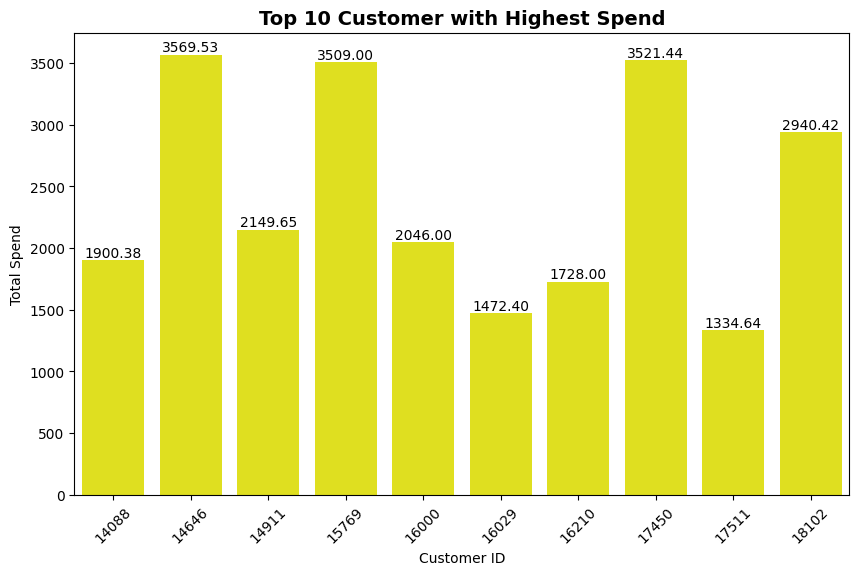

In [17]:
# visualize it
plt.figure(figsize=(10,6))
barplot = sns.barplot(data=top10_cust, x='CustomerID', y='total_spend', color='yellow')

for bar in barplot.patches:
    barplot.annotate(
        format(bar.get_height(), '.2f'),  # Format angka (2 desimal)
        (bar.get_x() + bar.get_width() / 2, bar.get_height()),  # Posisi anotasi
        ha='center', va='bottom', fontsize=10, color='black'
    )
plt.xticks(rotation=45)
plt.title('Top 10 Customer with Highest Spend', fontsize = 14, fontweight='bold')
plt.xlabel('Customer ID')
plt.ylabel('Total Spend')
plt.show()

Recommendation: Conduct a Loyalty Programs --> Reward these high-spending customers with exclusive benefits such as early access to new products, discounts, or personalized offers to retain their loyalty.

### Distinct Product Sold and their price distribution
We need to create a sub-dataframe containing `Description` and `UnitPrice` columns only, and ensure no duplication.

In [18]:
ecommerce.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_price
0,554697,21166,COOK WITH WINE METAL SIGN,1,2011-05-25 17:31:00,2.08,14584,United Kingdom,2.08
1,561038,82482,WOODEN PICTURE FRAME WHITE FINISH,2,2011-07-24 11:58:00,2.55,17114,United Kingdom,5.10
2,560552,23192,BUNDLE OF 3 ALPHABET EXERCISE BOOKS,1,2011-07-19 12:54:00,1.65,15311,United Kingdom,1.65
3,559884,85183B,CHARLIE & LOLA WASTEPAPER BIN FLORA,12,2011-07-13 11:34:00,1.25,16843,United Kingdom,15.00
4,544450,21789,KIDS RAIN MAC PINK,3,2011-02-20 12:23:00,0.85,17811,United Kingdom,2.55


In [19]:
# dataset baru yang ada pada level product
# tidak ada duplikasi product
prod = ecommerce.groupby('Description').agg(
    unit_price=('UnitPrice','mean')
).reset_index()

prod

,Description,unit_price
0,50'S CHRISTMAS GIFT BAG LARGE,1.25
1,DOLLY GIRL BEAKER,1.25
2,I LOVE LONDON MINI BACKPACK,4.15
3,RED SPOT GIFT BAG LARGE,1.25
4,SET 2 TEA TOWELS I LOVE LONDON,3.10
...,...,...
1802,ZINC METAL HEART DECORATION,1.25
1803,ZINC SWEETHEART WIRE LETTER RACK,3.75
1804,ZINC T-LIGHT HOLDER STAR LARGE,0.95
1805,ZINC T-LIGHT HOLDER STARS SMALL,0.83


In [20]:
# number of products
prod.shape[0]

1807

In [21]:
len(prod)

1807

In [22]:
prod['Description'].nunique()

1807

Text(0.5, 0, 'Unit Price')

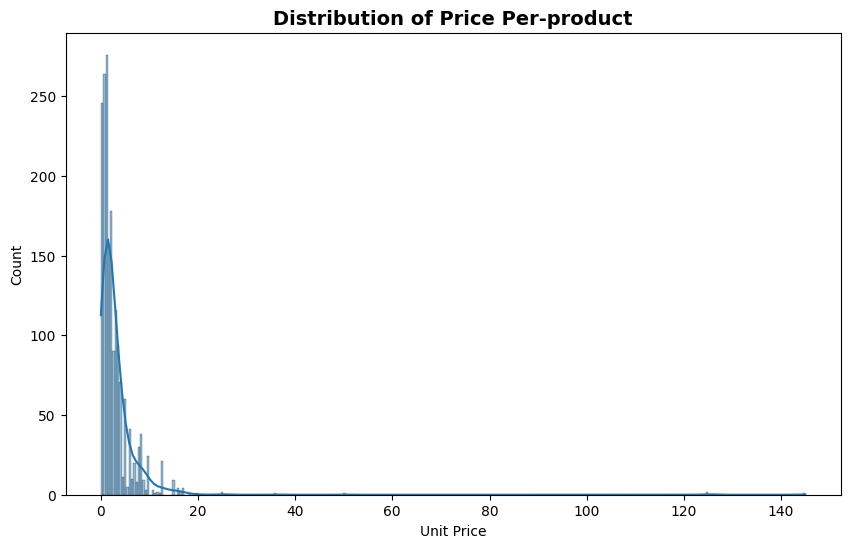

In [23]:
# price distribution
plt.figure(figsize=(10,6))
# sns.kdeplot(data=prod, x='UnitPrice')
sns.histplot(data=prod, x='unit_price', kde=True)
plt.title('Distribution of Price Per-product', fontsize = 14, fontweight='bold')
plt.xlabel('Unit Price')

The unit price has right-skewed distribution (Mean > Median) which the mean of price is above its median value.<br>
A right-skewed price distribution indicates that most products are priced affordably, with only a few premium products priced significantly higher. This may suggest a focus on mass-market products, but premium offerings still play a role in revenue generation.
The large number of distinct products suggests a wide range of offerings, potentially catering to diverse customer needs.

In [24]:
# summary statistics to inspect quartiles
prod.describe()

,unit_price
count,1807.000000
mean,3.048568
std,6.193955
min,0.040000
25%,0.850000
50%,1.650000
75%,3.750000
max,145.000000


### Customer Countries and which one is the best spender overall
We need to group by `Country` and `CustomerID`, then take the sum of `total_price`. After that, we draw boxplot side by side countries.

In [25]:
country_user = (ecommerce
                .groupby(['Country','CustomerID'])
                .agg(total_spend=('total_price','sum'))
                .reset_index())
country_user.head()

,Country,CustomerID,total_spend
0,Australia,12388,17.70
1,Australia,12393,16.60
2,Australia,12415,850.95
3,Australia,12431,51.75
4,Austria,12358,71.40


In [26]:
country_user['Country'].nunique()

31

In [27]:
country_user.Country.value_counts()

,count
Country,
United Kingdom,1735
Germany,49
France,43
Switzerland,12
Spain,12
Belgium,11
Portugal,8
Sweden,5
Norway,5


Invest in Key Market: Allocate more resources to the top 5 countries for marketing, logistics, and product availability to further strengthen market share.

In [28]:
# filter to top 5 contries (most CustomerID) only
# using isin technique
top5_countries = ['United Kingdom','Germany','France','Switzerland','Spain']
country_user = country_user[country_user['Country'].isin(top5_countries)]
country_user

,Country,CustomerID,total_spend
40,France,12490,148.40
41,France,12491,26.85
42,France,12494,49.20
43,France,12508,9.60
44,France,12509,8.50
...,...,...,...
1926,United Kingdom,18272,44.10
1927,United Kingdom,18276,7.90
1928,United Kingdom,18278,15.00
1929,United Kingdom,18280,17.85


<Axes: xlabel='Country', ylabel='total_spend'>

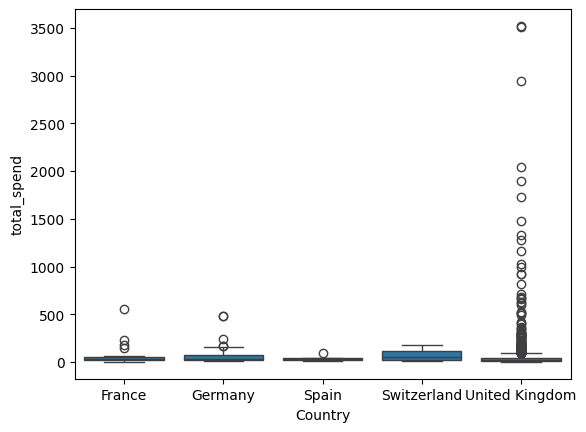

In [29]:
# draw boxplot for each top 5 countries
sns.boxplot(data=country_user,
            x='Country',
            y='total_spend')

In [30]:
# Clip max spend at 200 so that we can easily compare the boxplots
country_user['total_spend'] = country_user['total_spend'].clip(upper=200)

Text(0.5, 1.0, 'Distribution of Customer Spending in Top 5 Countries')

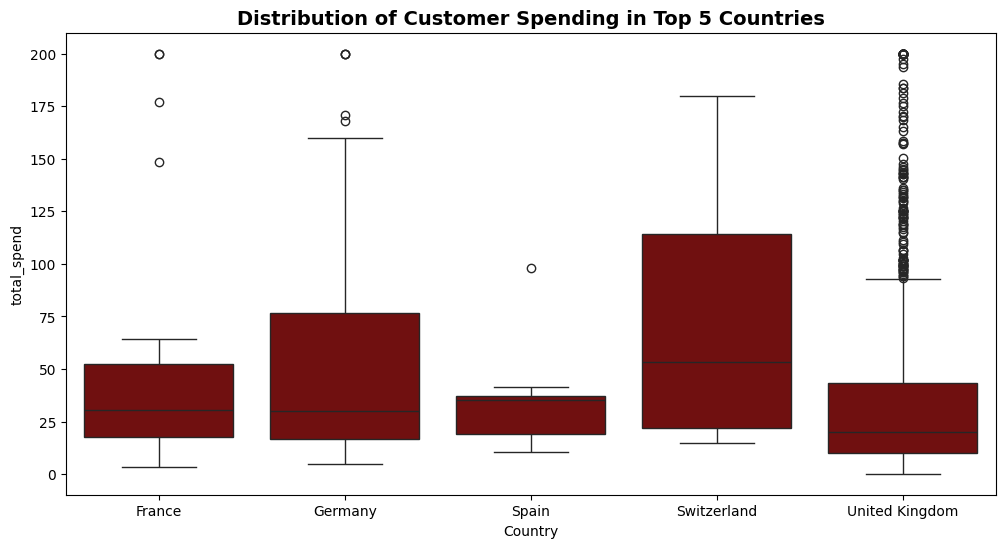

In [31]:
plt.figure(figsize=(12,6))
sns.boxplot(data=country_user,
            x='Country',
            y='total_spend', color='maroon')
plt.title('Distribution of Customer Spending in Top 5 Countries', fontsize = 14, fontweight='bold')

Observation:
- Top-Performing Markets: Switzerland and Germany are the strongest performers with high median spends and large spreads.
- **Potential for Premium Segments: The United Kingdom and Switzerland show opportunities to create premium offerings targeting high spenders.
- **Growth Opportunities: Spain requires strategies to improve overall customer engagement and increase spending.
Recommendation:
1. Revitalize the Spanish Market: Implement localized marketing campaigns or introduce budget-friendly product lines to engage more customers and increase spending in Spain.
2. Focus on High-Value Segments:
   - Target high-spending customers in Switzerland and Germany with exclusive promotions or loyalty programs to maximize revenue.
   - Investigate the behavior of high spenders in the United Kingdom to understand their preferences and replicate these success factors in other markets.

### Monthly time series of num buyers and total omzet

In [32]:
ecommerce.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_price
0,554697,21166,COOK WITH WINE METAL SIGN,1,2011-05-25 17:31:00,2.08,14584,United Kingdom,2.08
1,561038,82482,WOODEN PICTURE FRAME WHITE FINISH,2,2011-07-24 11:58:00,2.55,17114,United Kingdom,5.10
2,560552,23192,BUNDLE OF 3 ALPHABET EXERCISE BOOKS,1,2011-07-19 12:54:00,1.65,15311,United Kingdom,1.65
3,559884,85183B,CHARLIE & LOLA WASTEPAPER BIN FLORA,12,2011-07-13 11:34:00,1.25,16843,United Kingdom,15.00
4,544450,21789,KIDS RAIN MAC PINK,3,2011-02-20 12:23:00,0.85,17811,United Kingdom,2.55


In [33]:
# derive InvoiceMonth column
ecommerce['InvoiceMonth'] = ecommerce['InvoiceDate'].dt.to_period('M')
ecommerce.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_price,InvoiceMonth
0,554697,21166,COOK WITH WINE METAL SIGN,1,2011-05-25 17:31:00,2.08,14584,United Kingdom,2.08,2011-05
1,561038,82482,WOODEN PICTURE FRAME WHITE FINISH,2,2011-07-24 11:58:00,2.55,17114,United Kingdom,5.10,2011-07
2,560552,23192,BUNDLE OF 3 ALPHABET EXERCISE BOOKS,1,2011-07-19 12:54:00,1.65,15311,United Kingdom,1.65,2011-07
3,559884,85183B,CHARLIE & LOLA WASTEPAPER BIN FLORA,12,2011-07-13 11:34:00,1.25,16843,United Kingdom,15.00,2011-07
4,544450,21789,KIDS RAIN MAC PINK,3,2011-02-20 12:23:00,0.85,17811,United Kingdom,2.55,2011-02


In [34]:
# monthly_data
# derive number of buyers / month
# derive total omzet /month
monthly_data = (ecommerce
                .groupby('InvoiceMonth')
                .agg(num_buyer=('CustomerID','nunique'),
                     total_omzet=('total_price','sum'))
                .reset_index())

monthly_data['InvoiceMonth'] = monthly_data['InvoiceMonth'].astype(str)
monthly_data

,InvoiceMonth,num_buyer,total_omzet
0,2010-12,221,10810.55
1,2011-01,209,6247.52
2,2011-02,197,6152.46
3,2011-03,247,7162.64
4,2011-04,211,6357.63
5,2011-05,254,6987.24
6,2011-06,224,7203.93
7,2011-07,231,7569.27
8,2011-08,237,9904.91
9,2011-09,328,9761.11


## Evaluation Annual Buyers and Omzet


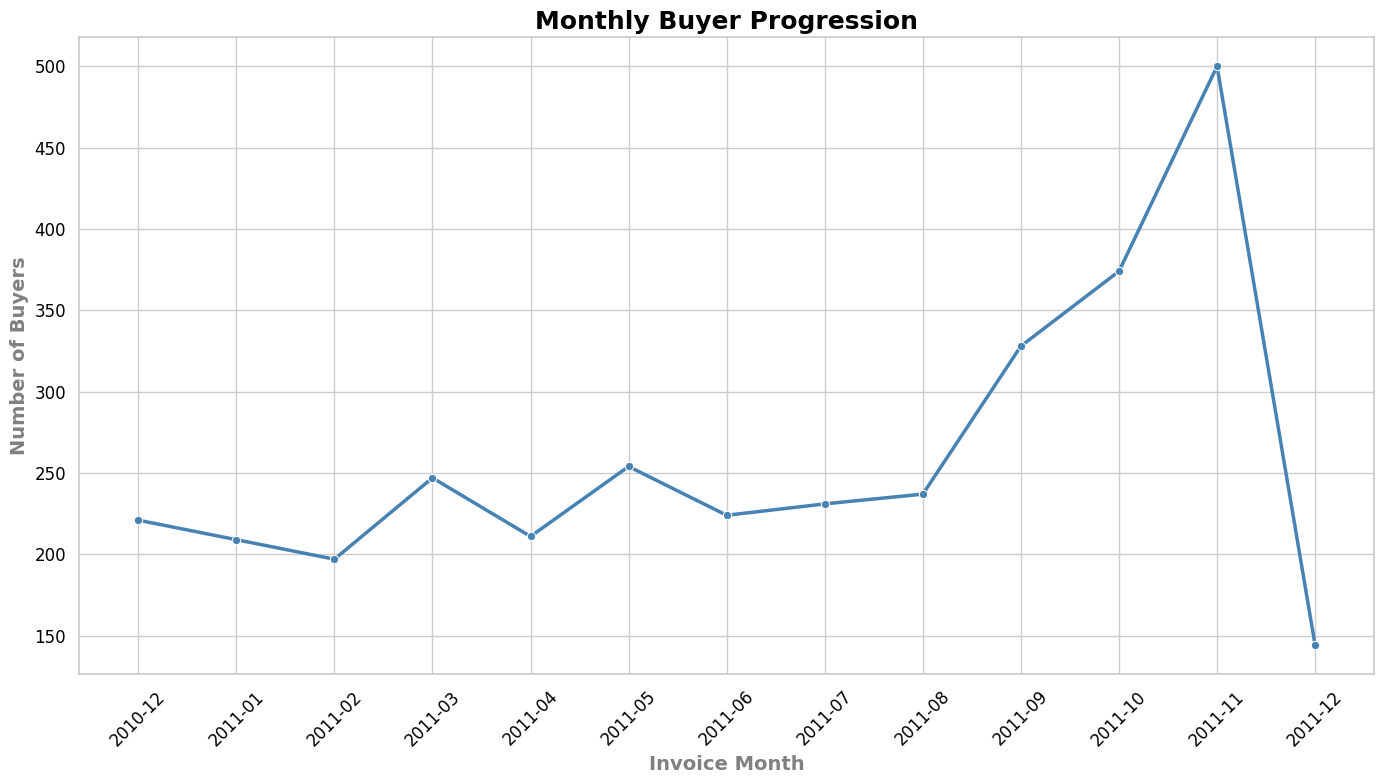

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a light theme
sns.set_theme(style="whitegrid")

# Plot the line chart
plt.figure(figsize=(14, 8))
sns.lineplot(
    data=monthly_data,
    x='InvoiceMonth',
    y='num_buyer',
    marker='o',
    color='steelblue',
    linewidth=2.5
)

# Add title and labels
plt.title('Monthly Buyer Progression', fontsize=18, fontweight='bold', color='black')
plt.xlabel('Invoice Month', fontsize=14, fontweight='bold', color='gray')
plt.ylabel('Number of Buyers', fontsize=14, fontweight='bold', color='gray')

# Rotate x-axis labels
plt.xticks(rotation=45, fontsize=12, color='black')
plt.yticks(fontsize=12, color='black')

# Tight layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


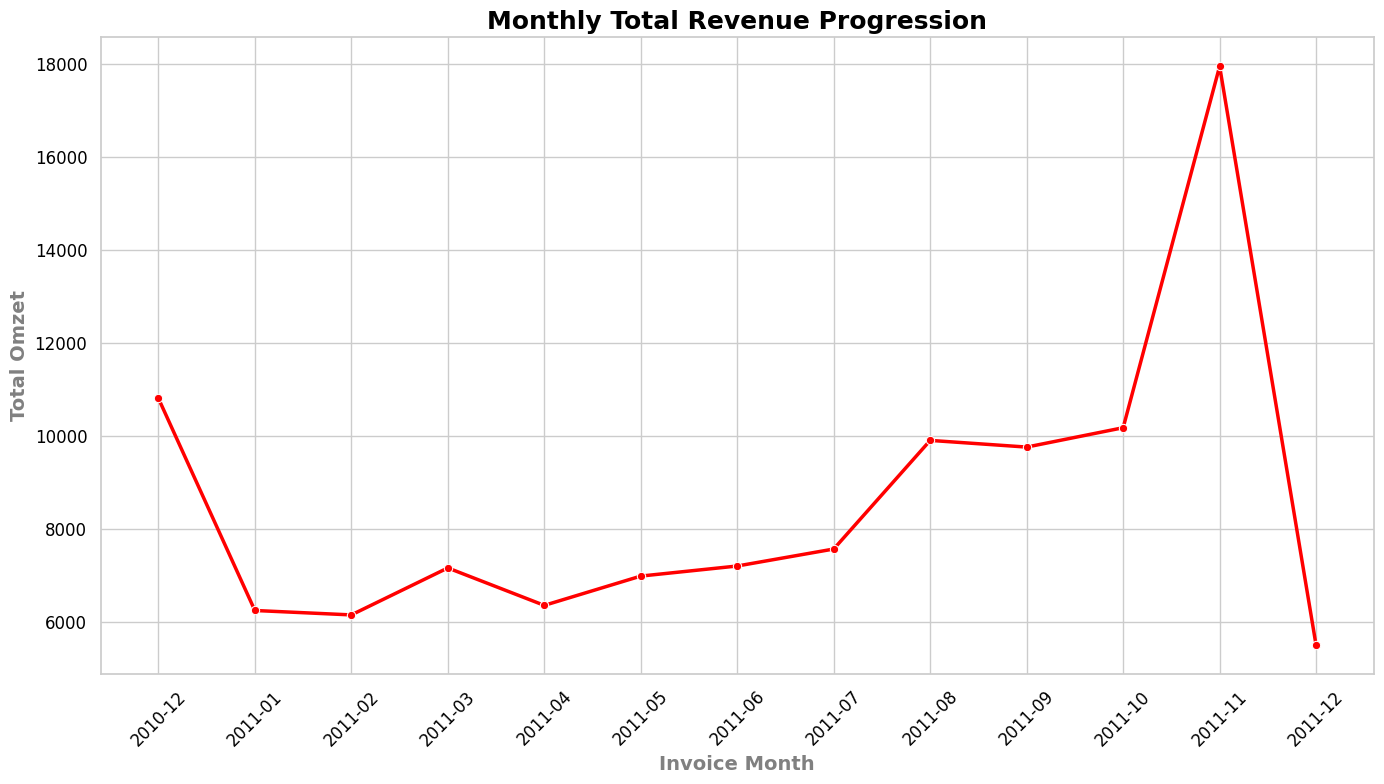

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a light theme
sns.set_theme(style="whitegrid")

# Plot the line chart
plt.figure(figsize=(14, 8))
sns.lineplot(
    data=monthly_data,
    x='InvoiceMonth',
    y='total_omzet',
    marker='o',
    color='red',
    linewidth=2.5
)

# Add title and labels
plt.title('Monthly Total Revenue Progression', fontsize=18, fontweight='bold', color='black')
plt.xlabel('Invoice Month', fontsize=14, fontweight='bold', color='gray')
plt.ylabel('Total Omzet', fontsize=14, fontweight='bold', color='gray')

# Rotate x-axis labels
plt.xticks(rotation=45, fontsize=12, color='black')
plt.yticks(fontsize=12, color='black')

# Tight layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

November is peak month. It's because black market campaign

Recommendation
- Plan Seasonal Campaigns: Replicate the success of the Black Market campaign during other peak seasons (e.g., holidays, festivals) to maintain high transaction volumes.
- Extend Campaign Duration: Explore extending the duration or expanding the scope of such campaigns to sustain momentum.